# Mini-Projet : Modèle de prédiction de la paire de devise EUR/USD par les techniques du deep learning ( Cas des réseaux LSTM )

In [1]:
import os
# récupérer le chemin du répertoire courant
path = os.getcwd()
print("Le répertoire courant est : " + path)
# récupérer le nom du répertoire courant
repn = os.path.basename(path)
print("Le nom du répertoire est : " + repn)

Le répertoire courant est : C:\Users\DELL
Le nom du répertoire est : DELL


In [2]:
# fixons la graine aléatoire pour assurer la reproducibilité
import numpy as np
np.random.seed(145)

# ANALYSE EXPLORATOIRE DES DONNES
##   Importation des librairies et de la base données

In [3]:
### Importation des données 

import pandas as pd
import numpy
import math
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
# %matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM

In [4]:
df= pd.read_csv('file:///C:/Users/DELL/Desktop/Mini_projet10/EUR_USD.csv' , sep=';')

In [5]:
# Affichons les 15 premières lignes
df.head(15)

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2000.02.01,0.9711,0.9782,0.9667,0.9713,6788,0,50
1,2000.02.02,0.9713,0.9808,0.9694,0.9765,6744,0,50
2,2000.02.03,0.9767,0.9947,0.9710,0.9898,7679,0,50
3,2000.02.04,0.9900,0.9940,0.9747,0.9840,7380,0,50
4,2000.02.07,0.9832,0.9832,0.9754,0.9809,5721,0,50
5,2000.02.08,0.9810,0.9914,0.9786,0.9859,6799,0,50
6,2000.02.09,0.9860,0.9971,0.9856,0.9934,7469,0,50
7,2000.02.10,0.9934,0.9962,0.9831,0.9852,7079,0,50
8,2000.02.11,0.9853,0.9886,0.9786,0.9884,6296,0,50
9,2000.02.14,0.9877,0.9916,0.9776,0.9785,6245,0,50


In [6]:
# nature des variables

In [7]:
print ('\n Types de Données:')
df.dtypes


 Types de Données:


DATE        object
OPEN       float64
HIGH       float64
LOW        float64
CLOSE      float64
TICKVOL      int64
VOL         object
SPREAD       int64
dtype: object

In [8]:
# valeurs manquantes
df.isna().sum()

DATE       0
OPEN       0
HIGH       0
LOW        0
CLOSE      0
TICKVOL    0
VOL        0
SPREAD     0
dtype: int64

##### Le jeu de données ne contient aucune valeur manquante

In [9]:
from datetime import datetime
con =df['DATE']
df['DATE']=pd.to_datetime(df['DATE'])


#### le type donnée est passé à datetime64[ns] 

#### Trions les données par date

In [10]:
df=df.sort_values('DATE')
df.head(15)                     

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2000-02-01,0.9711,0.9782,0.9667,0.9713,6788,0,50
1,2000-02-02,0.9713,0.9808,0.9694,0.9765,6744,0,50
2,2000-02-03,0.9767,0.9947,0.9710,0.9898,7679,0,50
3,2000-02-04,0.9900,0.9940,0.9747,0.9840,7380,0,50
4,2000-02-07,0.9832,0.9832,0.9754,0.9809,5721,0,50
5,2000-02-08,0.9810,0.9914,0.9786,0.9859,6799,0,50
6,2000-02-09,0.9860,0.9971,0.9856,0.9934,7469,0,50
7,2000-02-10,0.9934,0.9962,0.9831,0.9852,7079,0,50
8,2000-02-11,0.9853,0.9886,0.9786,0.9884,6296,0,50
9,2000-02-14,0.9877,0.9916,0.9776,0.9785,6245,0,50


In [11]:
df=pd.DataFrame(df)
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2000-02-01,0.97110,0.97820,0.96670,0.97130,6788,0,50
1,2000-02-02,0.97130,0.98080,0.96940,0.97650,6744,0,50
2,2000-02-03,0.97670,0.99470,0.97100,0.98980,7679,0,50
3,2000-02-04,0.99000,0.99400,0.97470,0.98400,7380,0,50
4,2000-02-07,0.98320,0.98320,0.97540,0.98090,5721,0,50
...,...,...,...,...,...,...,...,...
5750,2022-02-21,1.13141,1.13894,1.13058,1.13112,36104,0,16
5751,2022-02-22,1.13102,1.13660,1.12870,1.13225,62972,0,16
5752,2022-02-23,1.13223,1.13581,1.13003,1.13013,38769,0,16
5753,2022-02-24,1.13012,1.13079,1.11054,1.11894,104922,0,16


In [12]:
df1=pd.DataFrame(df,columns=['DATE','LOW','HIGH','CLOSE','OPEN'])

In [13]:
df1

,DATE,LOW,HIGH,CLOSE,OPEN
0,2000-02-01,0.96670,0.97820,0.97130,0.97110
1,2000-02-02,0.96940,0.98080,0.97650,0.97130
2,2000-02-03,0.97100,0.99470,0.98980,0.97670
3,2000-02-04,0.97470,0.99400,0.98400,0.99000
4,2000-02-07,0.97540,0.98320,0.98090,0.98320
...,...,...,...,...,...
5750,2022-02-21,1.13058,1.13894,1.13112,1.13141
5751,2022-02-22,1.12870,1.13660,1.13225,1.13102
5752,2022-02-23,1.13003,1.13581,1.13013,1.13223
5753,2022-02-24,1.11054,1.13079,1.11894,1.13012


### Visualisation des données sous forme de serie chronomogique

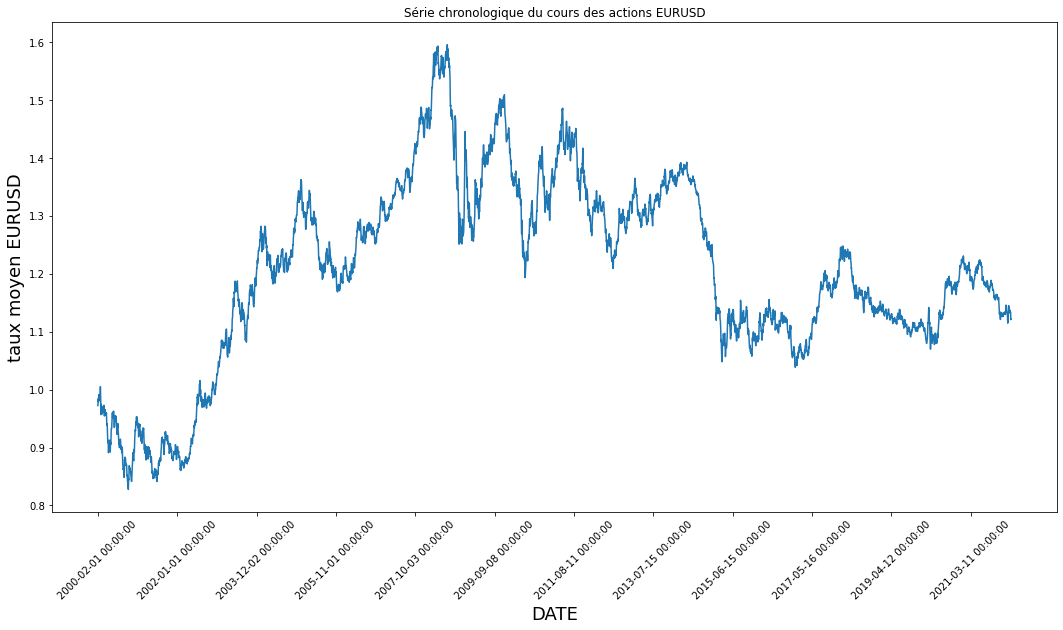

In [14]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),(df['LOW']+df['HIGH'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['DATE'].loc[::500],rotation=45)
plt.xlabel('DATE',fontsize=18)
plt.ylabel('taux moyen EURUSD',fontsize=18)
#plt.plot(rolling_mean,color='red',label='Moyenne mobile')
#plt.plot(rolling_std,color='black',label='Ecart-type mobile')
#plt.legend(loc='best')
plt.title('Série chronologique du cours des actions EURUSD')
plt.show()

#### On remarque une irrégularité dans l'évolution de la série sur la période de référence, elle présente une forte volatilité de la valeur moyenne de la paire de devise  EURUSD

#### Créons une nouvelle colonne valeur(taux de change moyen EURUSD)

In [16]:
df1['VALEUR']=(df['LOW']+df['HIGH'])/2.0

In [18]:
df1

,DATE,LOW,HIGH,CLOSE,OPEN,VALEUR
0,2000-02-01,0.96670,0.97820,0.97130,0.97110,0.972450
1,2000-02-02,0.96940,0.98080,0.97650,0.97130,0.975100
2,2000-02-03,0.97100,0.99470,0.98980,0.97670,0.982850
3,2000-02-04,0.97470,0.99400,0.98400,0.99000,0.984350
4,2000-02-07,0.97540,0.98320,0.98090,0.98320,0.979300
...,...,...,...,...,...,...
5750,2022-02-21,1.13058,1.13894,1.13112,1.13141,1.134760
5751,2022-02-22,1.12870,1.13660,1.13225,1.13102,1.132650
5752,2022-02-23,1.13003,1.13581,1.13013,1.13223,1.132920
5753,2022-02-24,1.11054,1.13079,1.11894,1.13012,1.120665


In [19]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Legraphique de la série suggère un model multiplicatif car la variation saisonnière varie dans le temps (elle baisse dans notre cas de figure)

In [21]:
resultat1=seasonal_decompose(df1.VALEUR,model='multiplicable',period=24)

<AxesSubplot:>

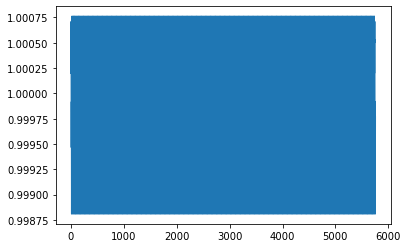

In [22]:
resultat1.seasonal.plot()

<AxesSubplot:>

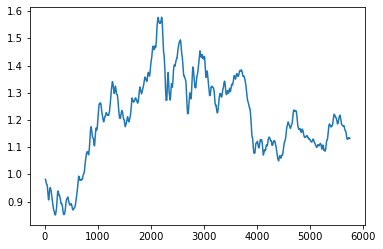

In [23]:
resultat1.trend.plot()

<AxesSubplot:>

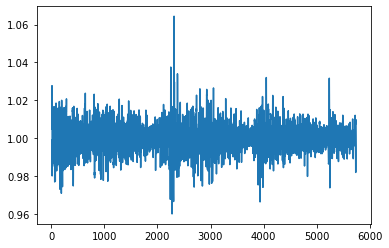

In [24]:
resultat1.resid.plot()

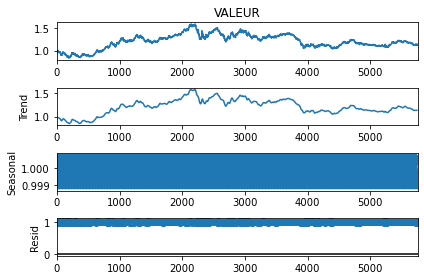

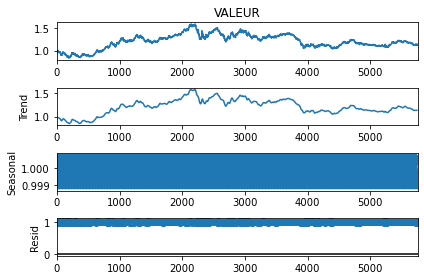

In [25]:
resultat1.plot()

#### Après décomposition de la serie, on constate une forte volatilité des résidus, laissant un doute quant à la satationarité du la série.
### Procédons au test de Dickey-Fuller augmenté
#####     Hypothèses du test:
######     H0: La Série temporelle est non stationnaire (elle a une structure dépendante du temps)
######    H1: La Série temporelle est stationnaire 

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
adfuller(df1.VALEUR)

(-1.9396670627208348,
 0.3136366049622411,
 3,
 5751,
 {'1%': -3.4314875797597644,
  '5%': -2.8620427016919505,
  '10%': -2.5670375862348798},
 -43662.5829062513)

#####     Interprétation des résultats
######     La statistique du test  est :-1,9396
######    La valeur P est : 0,3136 
######    Puisque la valeur de P est  supérieure à 0,05 , nous ne rejetons pas l'hypothèse nulle (H0). Cela signifie que la série chronologique n'est pas stationnaire. Nous traiterons ce cas dans le processus de normalisation des données. 

### Fractionnement du jeu de données en jeu d'apprentissage et jeu de test

In [28]:
Prix_moyen=df1['VALEUR']

#### Transformation du jeu de données en dataset apte à la normalisation des données

In [29]:
dataset1=df1.drop(['DATE','LOW','HIGH','CLOSE','OPEN'],axis=1)
dataset2 = dataset1.values
dataset = dataset2.astype('float32')

###       Normalisation du jeu de données
#####       Redimensionnons les données dans la plage de 0 à 1 à l'aide de la classe de prétraitement MinMaxScaler de la bibliothèque scikit-learn.

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [31]:
dataset

array([[0.18865216],
       [0.1921047 ],
       [0.20220184],
       ...,
       [0.39771998],
       [0.38175356],
       [0.3833822 ]], dtype=float32)

In [32]:
import tensorflow as tf

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [34]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3855 1900


#### Définissons une fonction pour créer un nouveau jeu de données où X est la valeur (EUR8USD) à un instant donné (t) et Y est la valeur à l''instant suivant (t + 1). Il peut être configuré, et nous le ferons en construisant un ensemble de données de forme différente dans la section suivante.

In [35]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### Préparons les ensembles de données d'entraînement et de test pour la modélisation.

In [36]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### Transformons le train préparé et testons les données d'entrée à l'aide de numpy.reshape().

In [37]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Conception du réseau LSTM

#### Notre réseau est formé pour 100 époques, a une couche visible avec 1 entrée, une couche cachée avec 4 neurones, et une couche de sortie qui fait une prédiction de valeur unique. Nous utilisons la fonction d'activation sigmoïde (fonction par défaut pour les blocs LSTM). 

In [38]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
3853/3853 - 9s - loss: 0.0141 - 9s/epoch - 2ms/step
Epoch 2/100
3853/3853 - 7s - loss: 9.1714e-05 - 7s/epoch - 2ms/step
Epoch 3/100
3853/3853 - 7s - loss: 9.2076e-05 - 7s/epoch - 2ms/step
Epoch 4/100
3853/3853 - 7s - loss: 9.2361e-05 - 7s/epoch - 2ms/step
Epoch 5/100
3853/3853 - 7s - loss: 9.1845e-05 - 7s/epoch - 2ms/step
Epoch 6/100
3853/3853 - 7s - loss: 9.2692e-05 - 7s/epoch - 2ms/step
Epoch 7/100
3853/3853 - 7s - loss: 8.9735e-05 - 7s/epoch - 2ms/step
Epoch 8/100
3853/3853 - 7s - loss: 9.0380e-05 - 7s/epoch - 2ms/step
Epoch 9/100
3853/3853 - 7s - loss: 8.8676e-05 - 7s/epoch - 2ms/step
Epoch 10/100
3853/3853 - 7s - loss: 9.0772e-05 - 7s/epoch - 2ms/step
Epoch 11/100
3853/3853 - 7s - loss: 9.0553e-05 - 7s/epoch - 2ms/step
Epoch 12/100
3853/3853 - 7s - loss: 8.8269e-05 - 7s/epoch - 2ms/step
Epoch 13/100
3853/3853 - 7s - loss: 8.9474e-05 - 7s/epoch - 2ms/step
Epoch 14/100
3853/3853 - 7s - loss: 8.9158e-05 - 7s/epoch - 2ms/step
Epoch 15/100
3853/3853 - 7s - loss: 8.8651e-05 

### Evaluation du modèle

### Prédiction

In [39]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

60/60 [==============================] - 0s 2ms/step


### Prédictions et transformations inverses

In [40]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### Calcul de l'erreur quadratique moyenne
#### Calcul des pertes RMSE ( dans notre cas de figure, nous avons utilisé 'Adam' comme optimiseur,il est recent et performant )

In [41]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.00 RMSE


### Prédiction du train de décalage pour le traçage

In [42]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

### Prédiction de test de décalage pour le traçage

In [43]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

### Tracer de ligne de base et prévision

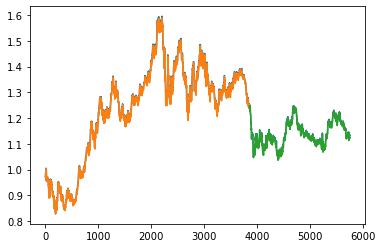

In [44]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### S'il est vrai qu'il n'existe pas de modèle parfait à la base; les LSTM sont capables de prédire correctement le comportement du cours des actions dans le temps, comme on peut le voir.